In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In [2]:
file_path = Path('Resources/Myopia.csv')
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df["MYOPIC"].nunique()

2

In [4]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [5]:
# Remove MYOPIC column
df = df.drop(["MYOPIC"], axis='columns')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
# Create scaler to standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## Part 2: Apply Dimensionality Reduction

In [7]:
# Initialize PCA model
pca = PCA(n_components=0.9)

myopia_PCA = pca.fit_transform(data_scaled)

In [8]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data= myopia_PCA, columns=["principal component 1", "principal component 2", "principal component 3"
                            ,"principal component 4", "principal component 5", "principal component 6",
                            "principal component 7", "principal component 8", "principal component 9", 
                            "principal component 10"]
)

df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [10]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [11]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [12]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

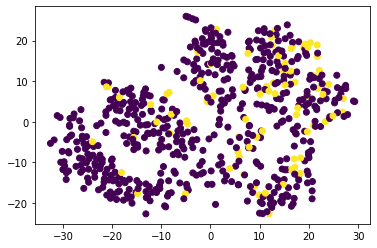

In [13]:
# Create scatter plot. Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

Are there distinct clusters? No distinct clusters

## Part 3: Perform a Cluster Analysis with K-means

In [14]:
# Transform PCA data to a DataFrame
df_two = pd.DataFrame(
    data=tsne_features, columns=["principal component 1", "principal component 2"
                             ]
)
df_two.head()

,principal component 1,principal component 2
0,-0.699305,5.022567
1,15.055317,13.522906
2,-23.532621,-13.657350
3,-8.400136,7.250525
4,17.948261,4.001985


In [15]:
# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_two)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

,k,inertia
0,1,244521.015625
1,2,115636.281250
2,3,71065.781250
3,4,54407.429688
4,5,41746.773438
5,6,34420.937500
6,7,28548.537109
7,8,23346.699219
8,9,20226.445312
9,10,17991.357422


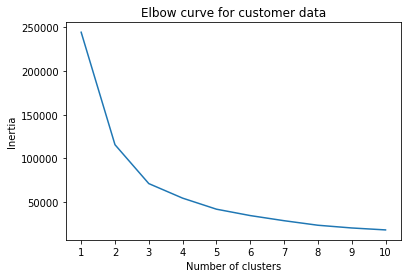

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

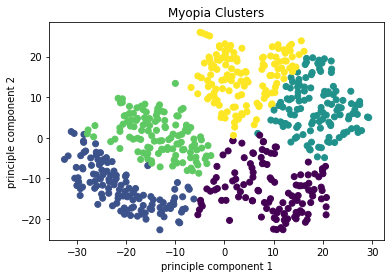

In [17]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_two)

# Predict clusters
predictions = model.predict(df_two)

# Add the predicted class column to the dataframe
df_two["class"] = model.labels_
df_two.head()

plt.scatter(x=df_two["principal component 1"], y=df_two["principal component 2"], c=df_two['class'])
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('Myopia Clusters')
plt.show()

## Part 4: Make a Recommendation

#### The plot shows 5 clusters, so in retrospect the answer to "Can the patients be clustered? If so, into how many clusters?", the answer is 5 clusters and yes they can  be clustered after reducing the dimensions , creating a new dataframe and running the k-means model. 